# 파이썬으로 배우는 통계학 (6장 일반선형모델)

## 6.3. 로지스틱 회귀

### 분석 준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline


### 6.3.10. 데이터 읽어들이기와 그래프 표시

In [2]:
# 데이터 읽기
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
test_result

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,9,1
96,9,1
97,9,1
98,9,1


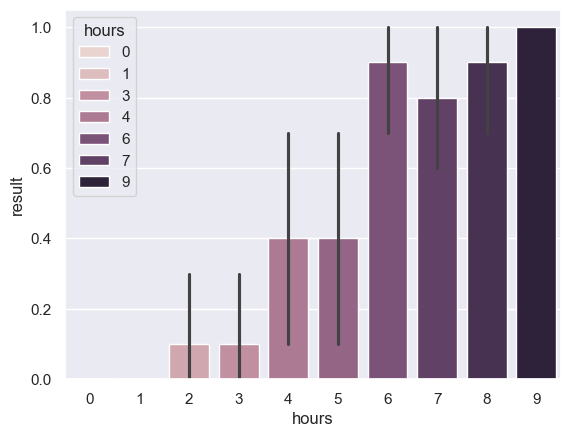

In [3]:
# 데이터 표시
sns.barplot(x = "hours",y = "result", data = test_result, hue='hours')
plt.show()

In [4]:
# 공부시간에 따른 합격률
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 6.3.11 로지스틱 회귀 실습
시험 합격 여부(합격=1, 불합격=0) ~ b0 + b1*(공부시간)

* b0 + b1*(공부시간) : 선형예측자 (-∞ 부터 +∞ 까지의 범위를 가질 수 있음)

* 시험합격률: 0~1 사이의 확률

링크 함수로 아래의 logistic function 사용: 선형예측자의 값에 따라 나올 수 있는 결과값을 0~1 사이 값으로 변환.

g(y) = 1 / (1+exp(-y))

* y = -∞ 일 때, g(y) = 0
* y = +∞ 일 때, g(y) = 1
* y = 0 일 때, g(y) = 0.5 

In [ ]:
# 모델링
mod_glm = smf.glm(formula = "result ~ hours", 
                  data = test_result, 
                  family=sm.families.Binomial()).fit()

### 6.3.12 로지스틱 회귀 결과의 출력

In [6]:
# 결과의 출력
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Mon, 02 Jun 2025   Deviance:                       68.028
Time:                        15:27:25   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

* Method: IRLS = Iterative Reweighted Least Squares (최소제곱법)
* 모델의 적합도 지표: Deviance, Pearson chi2, AIC
* 계수의 검정: Wald 검정 (P > |z|)

### 6.3.13 모델 선택

In [7]:
# Null 모델
mod_glm_null = smf.glm(
    "result ~ 1", data = test_result, 
    family=sm.families.Binomial()).fit()

In [8]:
# AIC의 비교
print("Null모델　：", mod_glm_null.aic.round(2))
print("변수가 있는 모델：", mod_glm.aic.round(2))

Null모델　： 139.99
변수가 있는 모델： 72.03


### 6.3.14 로지스틱 회귀곡선 그래프

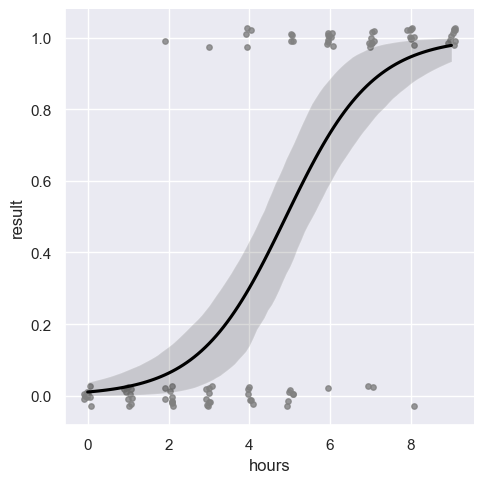

In [9]:
# lmplot으로 로지스틱 회귀곡선 그래프 그리기
sns.lmplot(x = "hours", y = "result",
           data = test_result, 
           logistic = True,
           scatter_kws = {"color": "gray", "s": 15},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.03)
plt.show()

### 6.3.15 성공확률 예측

In [ ]:
# 0~9까지 1씩 증가하는 등차수열 (공부 시간)
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 성공확률의 예측치
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6.3.17 로지스틱 회귀계수와 오즈 비(Odds ratio)의 관계

* 오즈(Odds) = p/(1-p). 성공:실패 확률의 비율이 얼마인가 (예: 성공확률 75%, 실패확률 25% -> 성공:실패 = 3:1 = 오즈 3)
* 오즈 비(Odds ratio): 오즈가 몇 배로 증가/감소했는가

## 📊 로지스틱 회귀계수와 오즈비(odds ratio)의 관계

### 🔹 1. 로지스틱 회귀 모델 식

로지스틱 회귀는 사건 발생 확률 \( p \)를 예측하는 대신, **로그 오즈 (log-odds)**를 예측합니다.

\[
\log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x
\]

- \( p \): 사건이 일어날 확률
- \( \frac{p}{1 - p} \): 오즈 (odds)
- \( \log(\text{odds}) \): 로그 오즈 또는 로짓(logit)
- \( \beta_1 \): 회귀계수 (기울기)

---

### 🔹 2. 회귀계수와 오즈비의 관계

로지스틱 회귀의 회귀계수는 **오즈의 로그값**이며, 이를 지수변환하면 오즈비(odds ratio)를 구할 수 있습니다.

\[
\text{Odds Ratio} = e^{\beta_1}
\]

- \( e^{\beta_1} > 1 \): x가 증가할수록 사건이 발생할 확률 증가
- \( e^{\beta_1} < 1 \): x가 증가할수록 사건이 발생할 확률 감소

---

### 🔹 3. 예시

예를 들어 회귀계수 \( \beta_1 = 0.405 \) 라면,

\[
\text{오즈비} = e^{0.405} \approx 1.5
\]

> x가 1 증가할 때, 사건이 발생할 **오즈가 1.5배 증가**한다는 의미입니다.

---

### 🔹 4. 해석 요약

| 회귀계수 \( \beta \) | 오즈비 \( e^{\beta} \) | 해석 |
|---------------------|------------------------|------|
| > 0                | > 1                   | x 증가 → 사건 발생 확률 증가 |
| < 0                | < 1                   | x 증가 → 사건 발생 확률 감소 |
| = 0                | = 1                   | x는 사건 발생과 무관 |



In [11]:
# 공부시간이 4시간, 5시간일 때의 합격률
exp_val = pd.DataFrame({"hours": [4, 5]})
pred_list = mod_glm.predict(exp_val)

print(pred_list)

pred_1 = pred_list[0]
pred_2 = pred_list[1]

0    0.300876
1    0.521427
dtype: float64


In [12]:
# 오즈(Odds): 실패하는 것보다 성공하는 것이 몇 배 더 가능성이 높은가.
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)
print([odds_1, odds_2])

# 오즈 비(Odd ratio)
print(odds_2/odds_1)

# 로그오즈비 
np.log(odds_2 / odds_1)

[np.float64(0.4303610926570525), np.float64(1.0895442650001606)]
2.5316978778757773


0.929

In [13]:
# 참고: 공부시간이 1시간 -> 2시간으로 늘어났을 때의 오즈 비
exp_val = pd.DataFrame({"hours": [1, 2]})
pred_list = mod_glm.predict(exp_val)
pred_1 = pred_list[0]
pred_2 = pred_list[1]

# 오즈(Odds): 실패하는 것보다 성공하는 것이 몇 배 더 가능성이 높은가.
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)
print([odds_1, odds_2])

# 오즈 비(Odd ratio)
print(odds_2/odds_1)

# 로그오즈비 
np.log(odds_2 / odds_1)

[np.float64(0.026521456371377337), np.float64(0.06714431481359097)]
2.5316978778757755


0.929

In [14]:
# 모델의 계수: beta
mod_glm.params["hours"]

0.929

In [15]:
# 참고: 오즈비 역산 = exp(beta)
# 입력변수 X가 1만큼 증가했을 때, Y의 가능성(odds)이 몇 배 늘어나는가?
np.exp(mod_glm.params["hours"])

2.532

**로지스틱 회귀의 구조**

log (p/(1-p)) = b0 + b1*(공부시간) 

p/(1-p) = exp (b0 + b1*(공부시간))

p = 1 / (1 + exp(-(b0 + b1*(공부시간))))

### 6.4.4. 피어슨 잔차
이항분포 B(N, p)
* 기대값: N * p
* 분산: N * p * (1-p)

피어슨 잔차

Pearson residuals = ( y - N * p ) / √(N * p * (1-p))  

Pearson residuals = ( y - p ) / √(p * (1-p))  : 각 단일 샘플에 대한 예측 오차


In [16]:
# 피어슨 잔차의 계산

# 예측한 성공확률
pred = mod_glm.predict()
# 종속변수(시험 합격여부)
y = test_result.result

# 피어슨 잔차
peason_resid = (y - pred) / np.sqrt(pred * (1 - pred))
peason_resid.head(5)

0   -0.102351
1   -0.102351
2   -0.102351
3   -0.102351
4   -0.102351
Name: result, dtype: float64

In [17]:
# 피어슨 잔차 (직접 추출)
mod_glm.resid_pearson.head(5)

0   -0.102351
1   -0.102351
2   -0.102351
3   -0.102351
4   -0.102351
dtype: float64

In [18]:
# 피어슨 잔차 제곱합
np.sum(mod_glm.resid_pearson**2)

84.911

In [19]:
# summary()함수에서 피어슨 잔차 제곱합 추출
mod_glm.pearson_chi2

84.911

In [20]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Mon, 02 Jun 2025   Deviance:                       68.028
Time:                        15:27:32   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

## 📊 로지스틱 회귀 결과표 해석 (마크다운)

### 🔹 기본 정보

| 항목 | 값 | 해석 |
|------|-----|------|
| **Dep. Variable** | result | 종속변수 이름 |
| **No. Observations** | 100 | 총 관측치 수 |
| **Df Residuals** | 98 | 잔차 자유도 (100 - 변수 수) |
| **Df Model** | 1 | 모델에 포함된 독립 변수 수 |
| **Model Family** | Binomial | 이항 분포 (로지스틱 회귀) |
| **Link Function** | Logit | 로그 오즈 (log-odds)를 사용하는 링크 함수 |
| **Method** | IRLS | 반복 가중 최소제곱법 |
| **Log-Likelihood** | -34.014 | 로그 가능도 (越 클수록 좋음) |
| **Deviance** | 68.028 | 모형의 이탈도 (越 작을수록 좋음) |
| **Pearson chi2** | 84.9 | 모형의 적합도 검정 통계량 |
| **No. Iterations** | 6 | 수렴까지의 반복 횟수 |
| **Pseudo R-squ. (CS)** | 0.5032 | 설명력 (Cox & Snell 기준) |
| **Covariance Type** | nonrobust | 오차 공분산 추정 방식 |

---

### 🔹 회귀계수 (Coefficient)


| 변수       | 계수 (coef) | 표준오차 (std err) | z값 (z) | p값 (P>|z|) | 95% 신뢰구간               |
|------------|-------------|---------------------|----------|---------------|----------------------------|
| Intercept  | -4.5587     | 0.901               | -5.061   | 0.000         | [-6.324, -2.793]           |
| hours      | 0.9289      | 0.174               | 5.345    | 0.000         | [0.588, 1.270]             |


---

### 🔹 오즈비 (Odds Ratio)

| 변수 | 오즈비 ( \( e^{\text{coef}} \) ) | 해석 |
|------|--------------------|-------|
| **hours** | \( e^{0.9289} \approx 2.53 \) | 공부시간 1시간 증가 시 합격 오즈가 약 2.53배 증가 |
| **신뢰구간** | \( [e^{0.588}, e^{1.270}] \approx [1.80, 3.56] \) | 95% 신뢰수준에서 오즈비 범위 |

### 6.4.8. deviance 잔차

로그우도(log likelihood)에 기반한 잔차

deviance = 2*((모든 합격여부를 완전히 예측할 때의 로그 우도) - (추정된 모델의 로그 우도))

In [21]:
# deviance 잔차제곱합 
np.sum(mod_glm.resid_deviance ** 2)

68.028